<a href="https://colab.research.google.com/github/armandoordonez/stats_learning_book/blob/main/Ex_2_8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline

# based on https://botlnec.github.io/islp/sols/chapter2/exercise8/

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format # Print only 2 decimal cases.


In [3]:
college = pd.read_csv("https://raw.githubusercontent.com/armandoordonez/stats_learning_book/main/College.csv") # Portable import, works on Windows as well.
college

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.00,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.30,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.40,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.80,49,40386,99


In [4]:
college = college.set_index("Unnamed: 0") # The default option 'drop=True', deletes the column
college.index.name = 'Names'
college.head()

# Alternative solution: We could have done this all in one less line with:
# college = pd.read_csv('../data/College.csv', index_col='Unnamed: 0')
#college.index.name = 'Names'
#college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Names,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90,2,10922,15


In [5]:
college.describe(include='all')

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,"3,001.64","2,018.80",779.97,27.56,55.80,"3,699.91",855.30,"10,440.67","4,357.53",549.38,"1,340.64",72.66,79.70,14.09,22.74,"9,660.17",65.46
std,NaN,"3,870.20","2,451.11",929.18,17.64,19.80,"4,850.42","1,522.43","4,023.02","1,096.70",165.11,677.07,16.33,14.72,3.96,12.39,"5,221.77",17.18
min,NaN,81.00,72.00,35.00,1.00,9.00,139.00,1.00,"2,340.00","1,780.00",96.00,250.00,8.00,24.00,2.50,0.00,"3,186.00",10.00
25%,NaN,776.00,604.00,242.00,15.00,41.00,992.00,95.00,"7,320.00","3,597.00",470.00,850.00,62.00,71.00,11.50,13.00,"6,751.00",53.00
50%,NaN,"1,558.00","1,110.00",434.00,23.00,54.00,"1,707.00",353.00,"9,990.00","4,200.00",500.00,"1,200.00",75.00,82.00,13.60,21.00,"8,377.00",65.00
75%,NaN,"3,624.00","2,424.00",902.00,35.00,69.00,"4,005.00",967.00,"12,925.00","5,050.00",600.00,"1,700.00",85.00,92.00,16.50,31.00,"10,830.00",78.00


In [6]:
# Alternative solution: call describe twice. One on number, and another on object.
college.describe(include=['number'])
# or college.describe(include=[np.number])

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,"3,001.64","2,018.80",779.97,27.56,55.80,"3,699.91",855.30,"10,440.67","4,357.53",549.38,"1,340.64",72.66,79.70,14.09,22.74,"9,660.17",65.46
std,"3,870.20","2,451.11",929.18,17.64,19.80,"4,850.42","1,522.43","4,023.02","1,096.70",165.11,677.07,16.33,14.72,3.96,12.39,"5,221.77",17.18
min,81.00,72.00,35.00,1.00,9.00,139.00,1.00,"2,340.00","1,780.00",96.00,250.00,8.00,24.00,2.50,0.00,"3,186.00",10.00
25%,776.00,604.00,242.00,15.00,41.00,992.00,95.00,"7,320.00","3,597.00",470.00,850.00,62.00,71.00,11.50,13.00,"6,751.00",53.00
50%,"1,558.00","1,110.00",434.00,23.00,54.00,"1,707.00",353.00,"9,990.00","4,200.00",500.00,"1,200.00",75.00,82.00,13.60,21.00,"8,377.00",65.00
75%,"3,624.00","2,424.00",902.00,35.00,69.00,"4,005.00",967.00,"12,925.00","5,050.00",600.00,"1,700.00",85.00,92.00,16.50,31.00,"10,830.00",78.00
max,"48,094.00","26,330.00","6,392.00",96.00,100.00,"31,643.00","21,836.00","21,700.00","8,124.00","2,340.00","6,800.00",103.00,100.00,39.80,64.00,"56,233.00",118.00


In [7]:
college.describe(include=['object'])
# or college.describe(include=['O'])

,Private
count,777
unique,2
top,Yes
freq,565


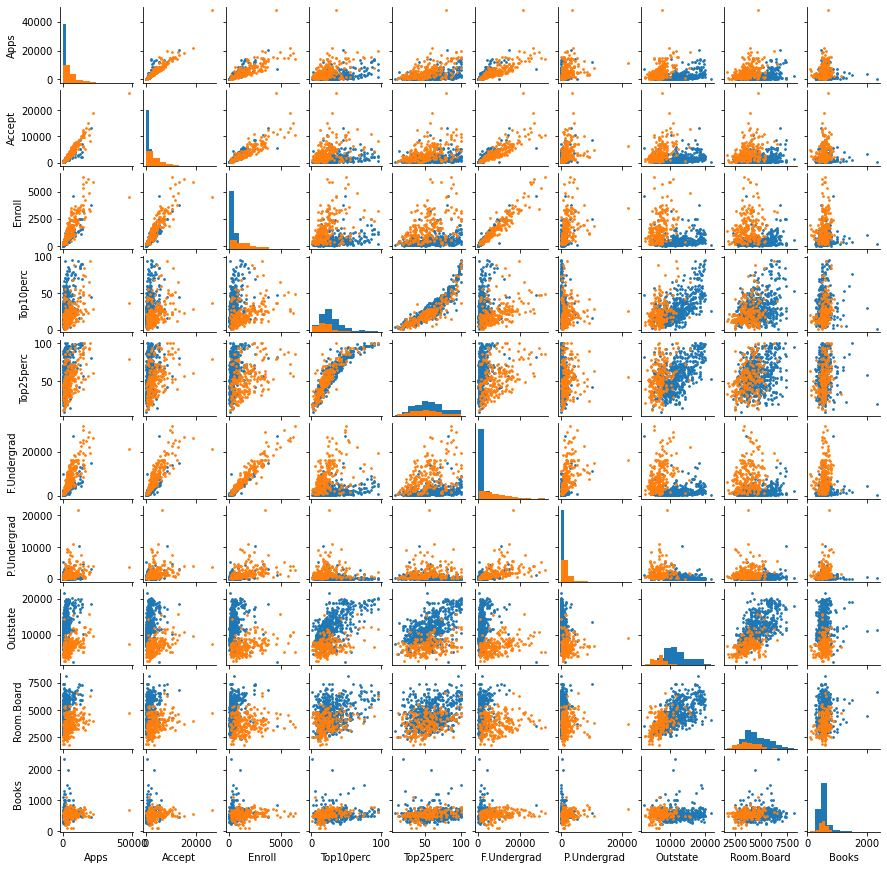

In [8]:
g = sns.PairGrid(college, vars=college.iloc[:,1:11], hue='Private')
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(plt.scatter, s=3)
g.fig.set_size_inches(12, 12)

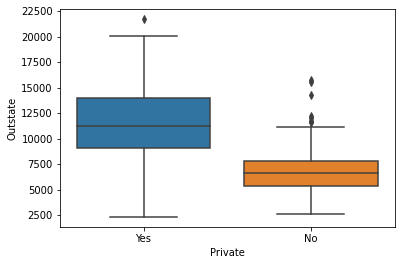

In [9]:
sns.boxplot(x='Private', y='Outstate', data=college);

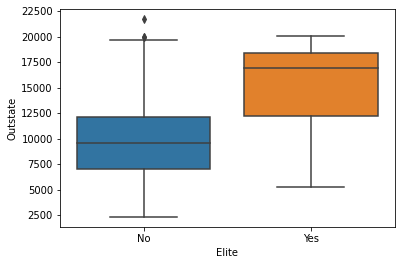

In [10]:
college.loc[college['Top10perc']>50, 'Elite'] = 'Yes'
college['Elite'] = college['Elite'].fillna('No')

sns.boxplot(x='Elite', y='Outstate', data=college);

In [11]:
# Bins creation
college['PhD'] = pd.cut(college['PhD'], 3, labels=['Low', 'Medium', 'High'])
college['Grad.Rate'] = pd.cut(college['Grad.Rate'], 5, labels=['Very low', 'Low', 'Medium', 'High', 'Very high'])
college['Books'] = pd.cut(college['Books'], 2, labels=['Low', 'High'])
college['Enroll'] = pd.cut(college['Enroll'], 4, labels=['Very low', 'Low', 'High', 'Very high'])

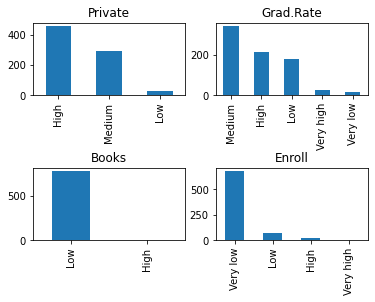

In [14]:
# Plot histograms
fig = plt.figure()

plt.subplot(221)
college['PhD'].value_counts().plot(kind='bar', title = 'Private');
plt.subplot(222)
college['Grad.Rate'].value_counts().plot(kind='bar', title = 'Grad.Rate');
plt.subplot(223)
college['Books'].value_counts().plot(kind='bar', title = 'Books');
plt.subplot(224)
college['Enroll'].value_counts().plot(kind='bar', title = 'Enroll');

fig.subplots_adjust(hspace=1) # To add space between subplots